**Analiza slovenskih hribov**
Za svojo projektno nalogo bom analizirala podatke o slovenskih hribih, gorah in še čem, najdenih na [spletni strani hribi.net](https://www.hribi.net/).
Za začetek si oglejmo tabelo z vsemi podatki, urejeno padajoče po priljubljenosti.

In [23]:
import pandas as pd
tabela_gora = pd.read_csv("podatki v csv/gore.csv")
tabela_gora = tabela_gora.rename(
    columns={"priljubljenost": "priljubljenost (%)", "st_poti": "število poti", "st_slik": 
    "število slik", "visina": "višina"})
    

In [24]:
tabela_gora.sort_values("priljubljenost (%)", ascending=False)

,gorovje,ime,ogledi,priljubljenost (%),število poti,število slik,višina,vrsta
2592,Karavanke,Dom na Kofcah,1083679,100,13,18,1488,"['koča', ' planina', ' cerkev']"
802,Julijske Alpe,Krn,982160,100,12,21,2244,['vrh']
1842,Kamniško Savinjske Alpe,Kamniška koča na Kamniškem sedlu,1034208,100,4,13,1864,"['koča', ' bivak', ' sedlo']"
1843,Kamniško Savinjske Alpe,Kamniška koča na Kamniškem sedlu,1034208,100,4,13,1864,"['koča', ' bivak', ' sedlo']"
2593,Karavanke,Dom na Kofcah,1083679,100,13,18,1488,"['koča', ' planina', ' cerkev']"
...,...,...,...,...,...,...,...,...
4518,"Strojna, Košenjak, Kozjak in Slovenske gorice",Lovsko zavetišče LD Mala Nedelja,30,3,1,1,215,['koča']
3188,"Pohorje, Dravinjske gorice in Haloze",Sveti Lenart (Koritno),16,2,1,3,745,['cerkev']
3189,"Pohorje, Dravinjske gorice in Haloze",Sveti Lenart (Koritno),16,2,1,3,745,['cerkev']
3206,"Pohorje, Dravinjske gorice in Haloze",Sveti Miklavž (Koritno),16,1,1,2,678,['cerkev']


Ker smo opazili, da se kot "vrsta" gore pogosto pojavi nekaj, kar sploh ni vrh, temveč je le npr. cerkev ali jezero, si želimo pogledati, če so vrhovi sploh najpogovstejša vrsta objekta na spletni strani. Če niso, potem lahko pišemo adminu, naj spletno stran preimenuje v "cerkve.net", "jezera.net" ali karkoli je že primerno.

<Axes: xlabel='vrsta'>

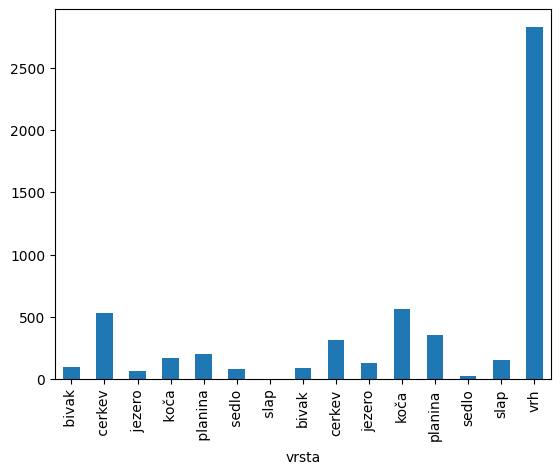

In [28]:
import matplotlib
vrste = pd.read_csv("podatki v csv/vrste.csv")
objekti_po_vrstah = vrste.groupby("vrsta")
objekti_po_vrstah.size().plot.bar()